# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/TimeSeriesCourse/practice/05 Snippets')

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
%%capture
!pip install stumpy

Импорт библиотек и модулей

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets
import pandas as pd

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

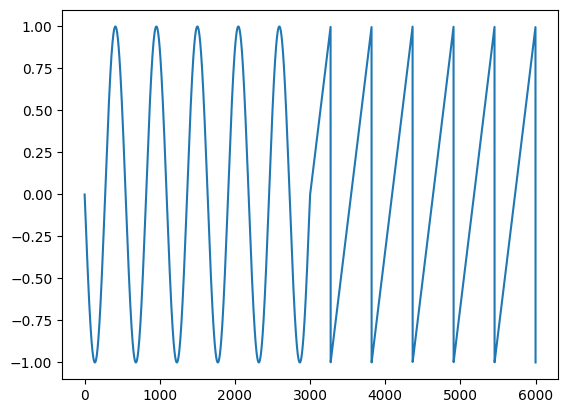

In [7]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [8]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


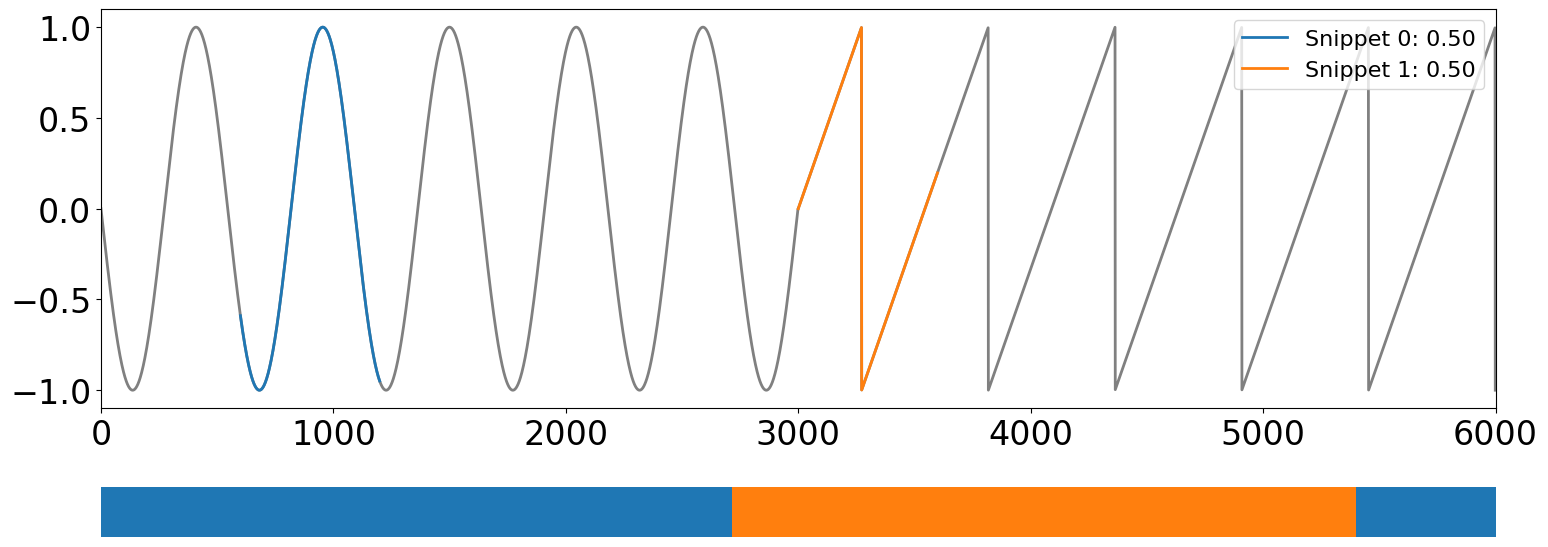

<Axes: >

In [9]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [56]:
data = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T
start = 1790
end = 1930

ts = data.loc[start < data.iloc[:, 0]].loc[data.iloc[:, 0] < end].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

500


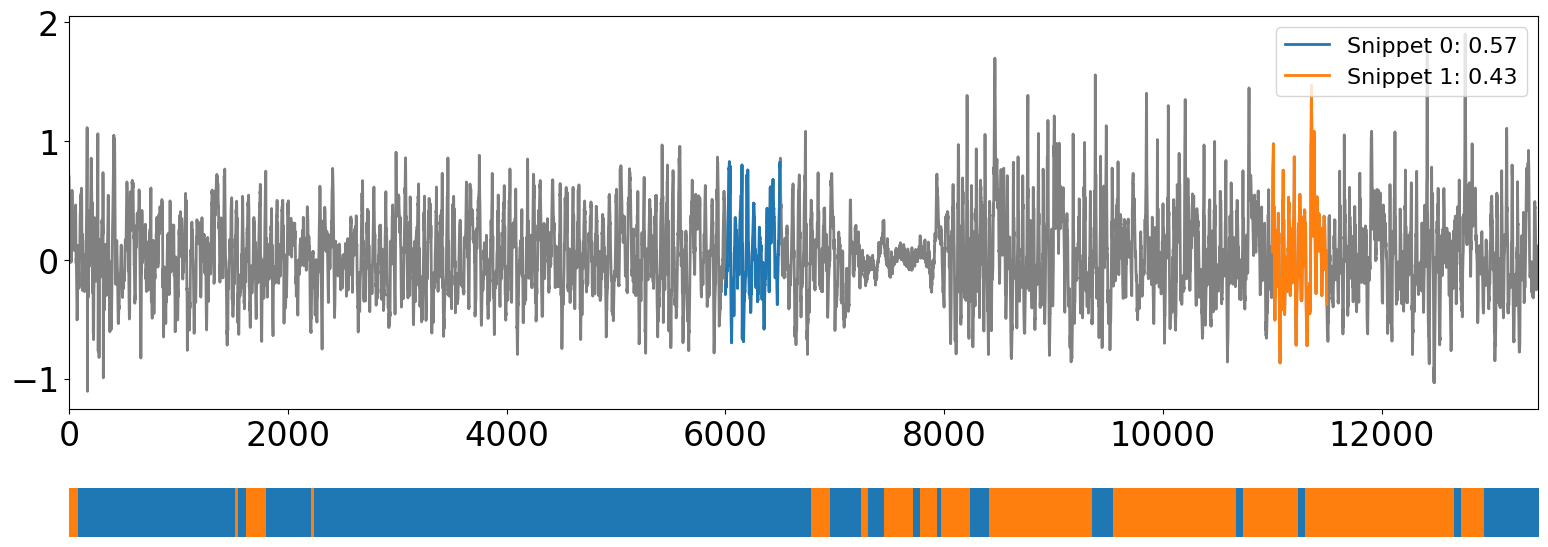

<Axes: >

In [44]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [98]:
data = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None)
start = 1790
end = 1930

labels = data.loc[:,start < data.iloc[0,:]].loc[:,end > data.iloc[0,:]].iloc[1,:].to_numpy()
set(labels)

{12.0, 13.0}

In [111]:
regimes = snp[5]
regimes_sorted = regimes[regimes[:,1].argsort()]

pred_labels = np.array([])
for item in regimes_sorted:
  if (item[0] == 1):
    current_interval = np.full(item[2] - item[1], 13.0)
  elif (item[0] == 0):
    current_interval = np.full(item[2] - item[1], 12.0)
  pred_labels = np.concatenate([pred_labels, current_interval])

labels = labels[:len(pred_labels)]

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_labels, labels))

0.8991492652745553


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [ ]:
# INSERT YOUR CODE

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?